# Calorie Prediction

## Загрузка и обзор данных

In [123]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, GridSearchCV
from sklearn.svm import SVR

In [124]:
DATA_PATH = "C:/Users/Us/Desktop/datasets/kaggle/"
#DATA_PATH = "C:/Users/AZAT/Desktop/Скрипт Jupyter/kaggle/"

In [125]:
df = pd.read_csv(DATA_PATH + 'gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [126]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [127]:
df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

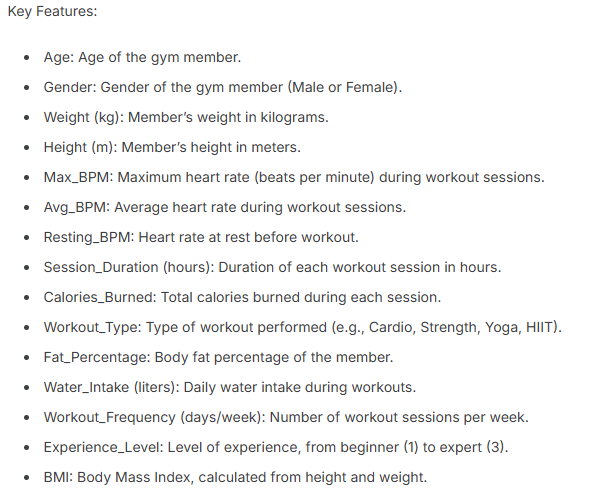

In [128]:
from IPython.display import Image
Image('C:/Users/Us/Desktop/key_features.png')

In [129]:
df.shape

(973, 15)

In [130]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [132]:
df.duplicated().sum()

0

In [133]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Text(0.5, 1.0, 'Age by Gender')

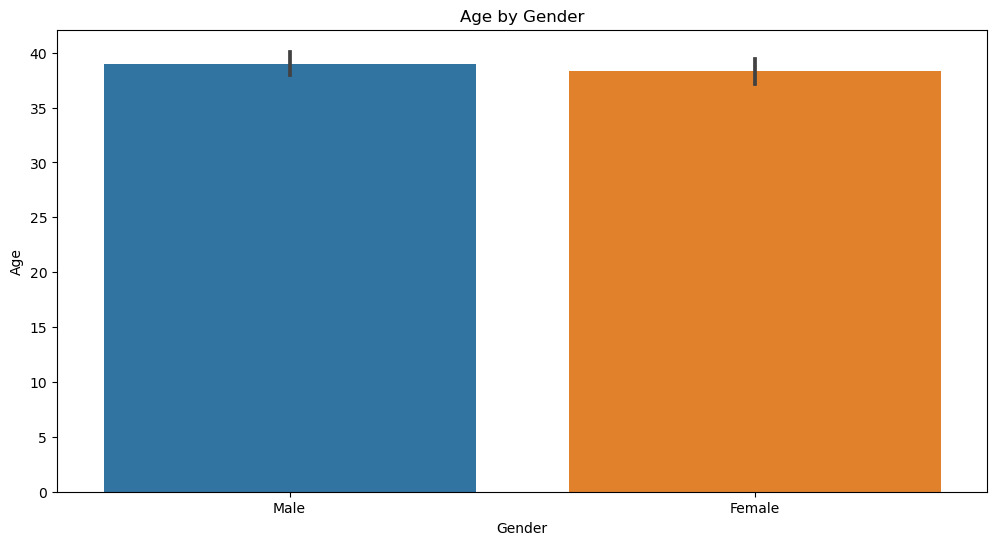

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Gender', y='Age')
plt.title('Age by Gender')

Text(0.5, 1.0, 'Weight by Gender')

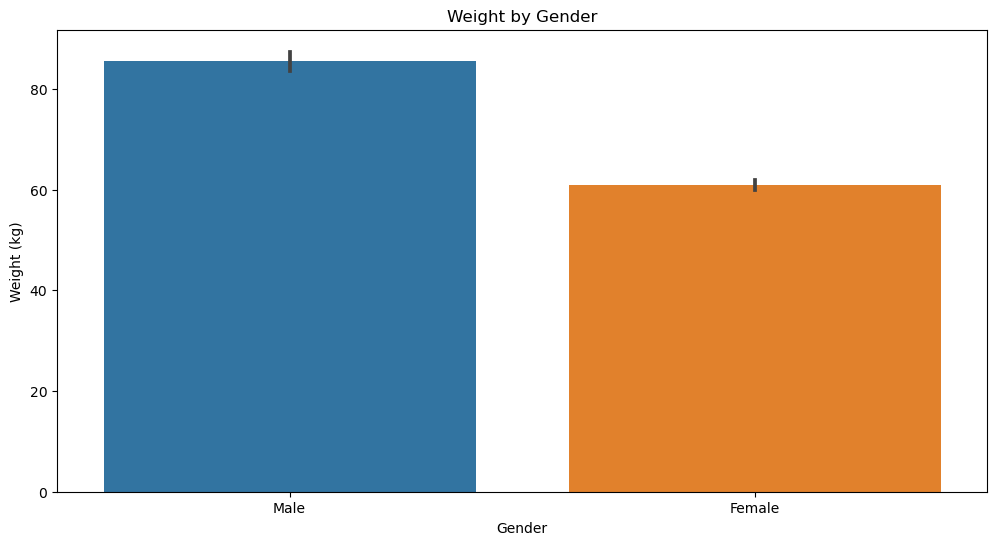

In [135]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Weight (kg)')
plt.title("Weight by Gender")

Text(0.5, 1.0, 'Max_BPM by Gender')

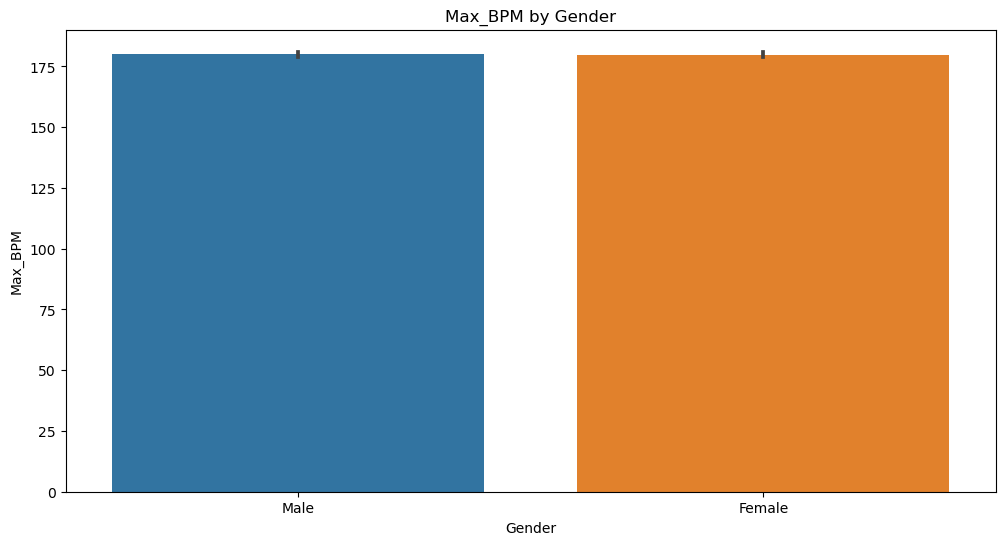

In [136]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Max_BPM')
plt.title('Max_BPM by Gender')

<Axes: xlabel='Workout_Type', ylabel='count'>

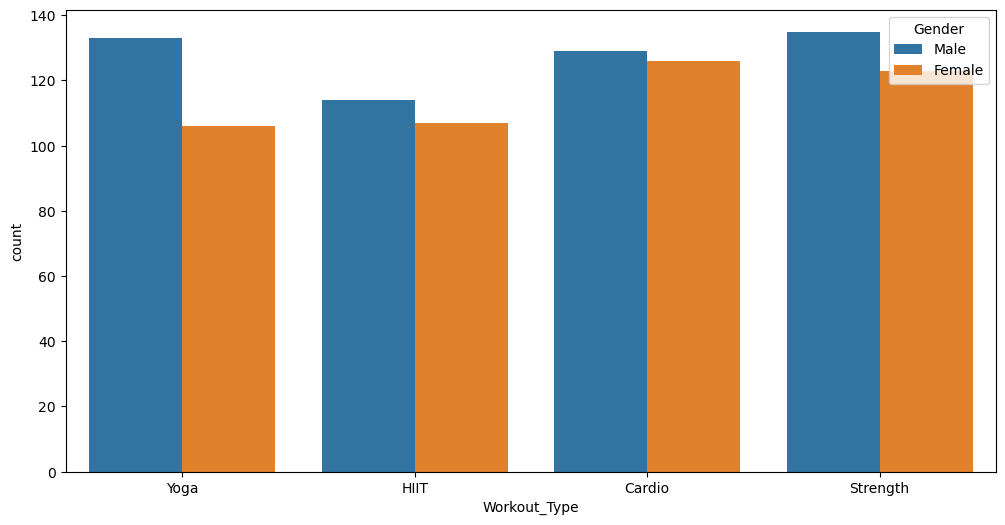

In [137]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Workout_Type', hue='Gender')

<Axes: ylabel='Frequency'>

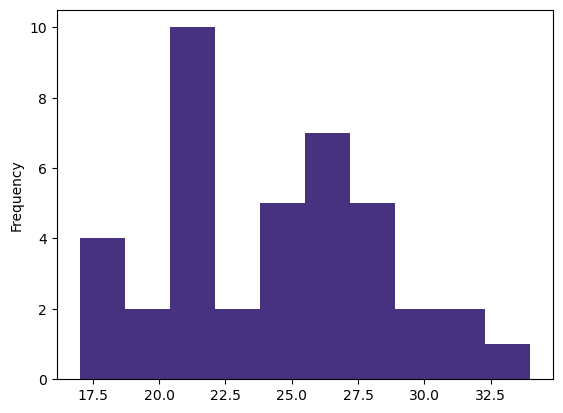

In [138]:
df['Max_BPM'].value_counts().plot(kind='hist', color=sns.palettes.mpl_palette("viridis"))

In [139]:
df['Workout_Type'].describe()

count          973
unique           4
top       Strength
freq           258
Name: Workout_Type, dtype: object

In [140]:
df['Workout_Type'].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [141]:
df['Workout_Frequency (days/week)'].unique()

array([4, 3, 5, 2], dtype=int64)

0 - Strength

1 - Cardio

2 - Yoga

3 - HIIT

<Axes: ylabel='count'>

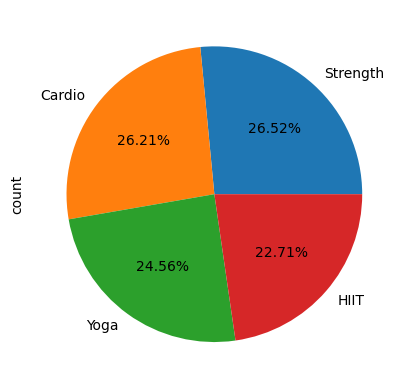

In [142]:
df['Workout_Type'].value_counts().plot(kind='pie', autopct="%.2f%%")

<Axes: xlabel='Workout_Type', ylabel='Calories_Burned'>

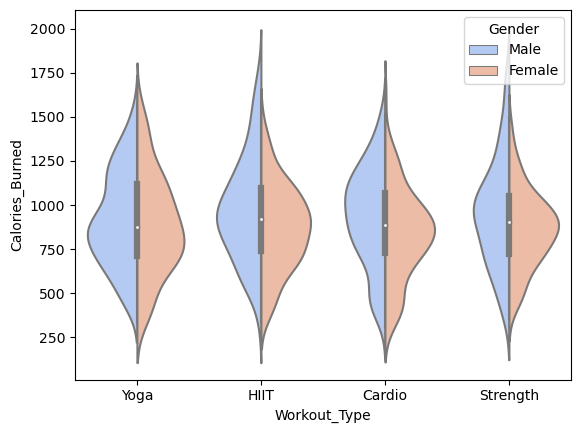

In [143]:
sns.violinplot(data=df, x='Workout_Type', y='Calories_Burned', hue='Gender', split=True, palette='coolwarm')

<Axes: xlabel='Water_Intake (liters)', ylabel='Age'>

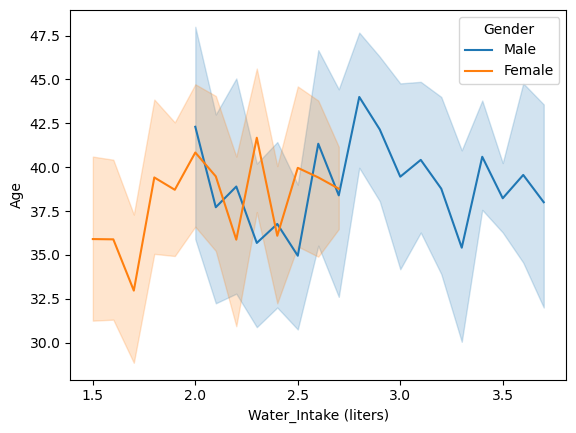

In [144]:
sns.lineplot(data=df, x='Water_Intake (liters)', y='Age', hue='Gender')

In [147]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

Вывод:

1) Нарушение стиля наименований переменных - встречаются пробелы
   

## Предобработка данных

In [148]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [149]:
df.rename(columns={'Weight (kg)': 'Weight_kg', 
                   'Height (m)': 'Height_m', 
                   'Session_Duration (hours)': 'Session_Duration_hours', 
                   'Water_Intake (liters)': 'Water_Intake_liters', 
                   'Workout_Frequency (days/week)': 'Workout_Frequency_days'}, inplace=True)

In [150]:
df.columns

Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters',
       'Workout_Frequency_days', 'Experience_Level', 'BMI'],
      dtype='object')

In [ ]:
numeric_data = []
categorical_data = []

for column in df.colunms:
    if df[columns].dtype in ['int64', '']

In [26]:
df.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


<Axes: xlabel='Age', ylabel='Fat_Percentage'>

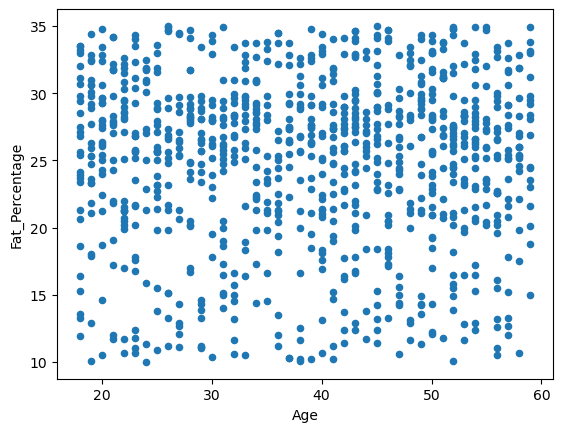

In [27]:
df.plot(x='Age', y='Fat_Percentage', kind='scatter')

Gender
Male    Axes(0.125,0.11;0.775x0.77)
dtype: object

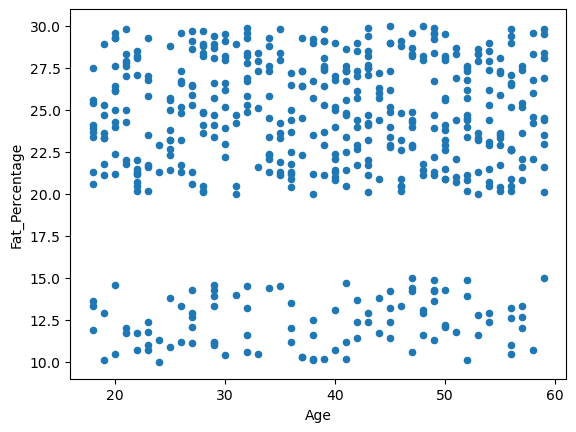

In [28]:
df[df['Gender'] == 'Male'].groupby(by=['Gender']).plot(x='Age', y='Fat_Percentage', kind='scatter')

In [29]:
df.groupby(by = 'Workout_Type').size()

Workout_Type
Cardio      255
HIIT        221
Strength    258
Yoga        239
dtype: int64

<Axes: ylabel='Workout_Type'>

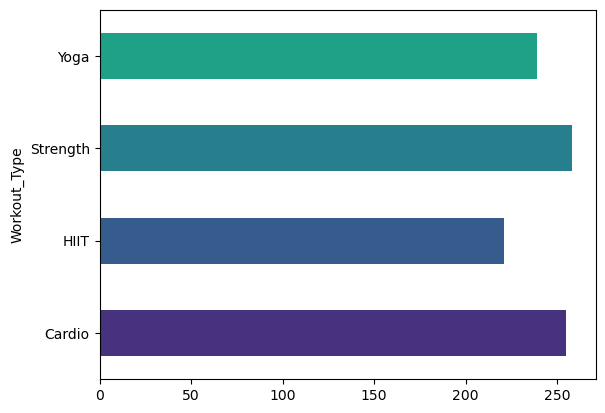

In [30]:
df.groupby(by ='Workout_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette("viridis"))

<Axes: ylabel='Workout_Type'>

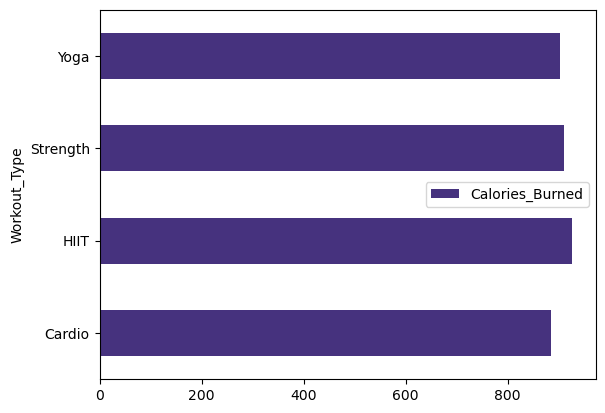

In [31]:
df[['Workout_Type', 'Calories_Burned']].groupby(by ='Workout_Type').agg('mean').plot(kind='barh', color=sns.palettes.mpl_palette("viridis"))

In [32]:
df.groupby(by=df['Workout_Type'], as_index=False).agg({'Calories_Burned': 'mean'}).round(2)

,Workout_Type,Calories_Burned
0,Cardio,884.51
1,HIIT,925.81
2,Strength,910.70
3,Yoga,903.19


In [33]:
df.groupby(by=[df['Workout_Type'], df['Gender']], as_index=False).agg({'Calories_Burned': 'mean'}).round(2)

,Workout_Type,Gender,Calories_Burned
0,Cardio,Female,834.79
1,Cardio,Male,933.08
2,HIIT,Female,869.95
3,HIIT,Male,978.23
4,Strength,Female,863.10
5,Strength,Male,954.07
6,Yoga,Female,886.12
7,Yoga,Male,916.79


In [34]:
df.groupby(by=[df['Workout_Type'], df['Gender']], as_index=False).agg({'Avg_BPM': 'mean', 'Max_BPM': 'mean'}).round(2)

,Workout_Type,Gender,Avg_BPM,Max_BPM
0,Cardio,Female,144.13,180.83
1,Cardio,Male,143.65,178.94
2,HIIT,Female,144.18,178.94
3,HIIT,Male,142.91,181.21
4,Strength,Female,143.21,179.04
5,Strength,Male,145.32,179.01
6,Yoga,Female,142.92,180.14
7,Yoga,Male,143.54,180.98


In [35]:
df.columns

Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters',
       'Workout_Frequency_days', 'Experience_Level', 'BMI'],
      dtype='object')

Text(0.5, 1.0, 'BMI by Weight')

<Figure size 1200x600 with 0 Axes>

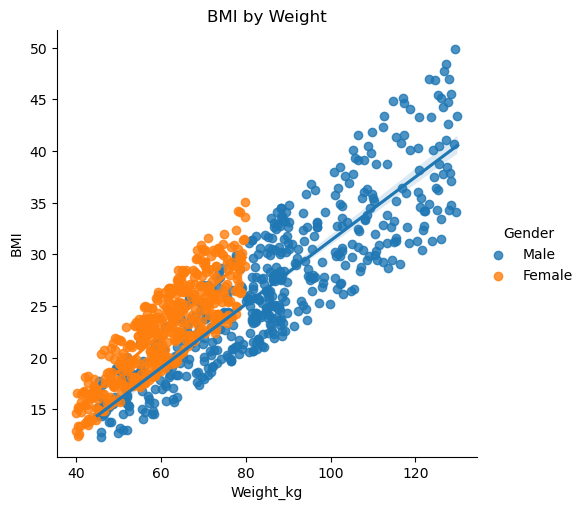

In [36]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='Weight_kg', y='BMI', hue='Gender')
plt.title('BMI by Weight')

Text(0.5, 1.0, 'Duration by Frequency')

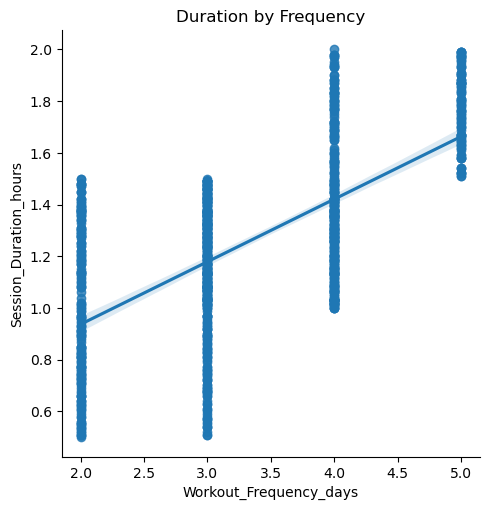

In [37]:
sns.lmplot(data=df, x='Workout_Frequency_days', y='Session_Duration_hours')
plt.title('Duration by Frequency')

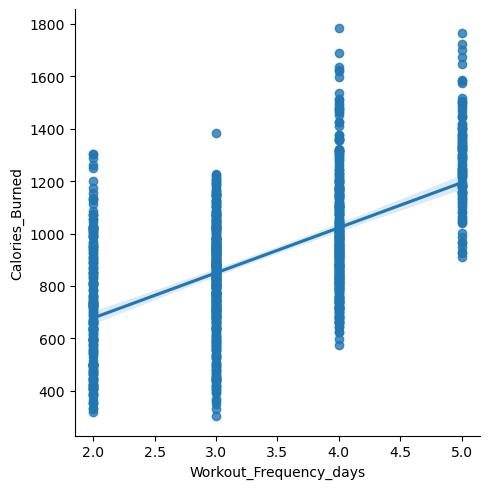

In [38]:
sns.lmplot(data=df, x='Workout_Frequency_days', y='Calories_Burned')

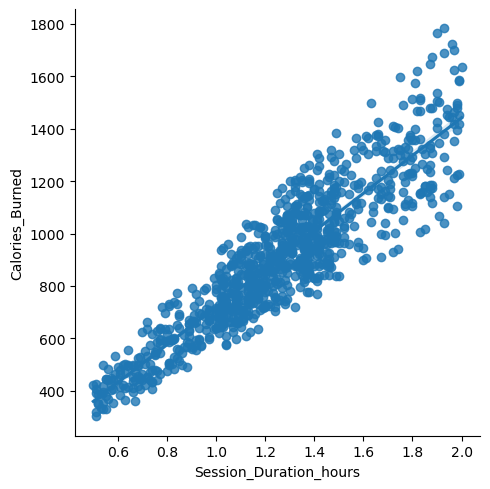

In [39]:
sns.lmplot(data=df, x='Session_Duration_hours', y='Calories_Burned')

In [40]:
df['Gender'].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [41]:
changes = {'Male': 0, 'Female': 1}

In [42]:
df['Gender'] = df['Gender'].map(changes)

In [43]:
df['Gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64

In [44]:
df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [45]:
changes_2 = {'Strength': 0, 'Cardio':1, 'Yoga':2, 'HIIT':3}

In [46]:
df['Workout_Type'] = df['Workout_Type'].map(changes_2)

In [47]:
df['Workout_Type'].head()

0    2
1    3
2    1
3    0
4    0
Name: Workout_Type, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

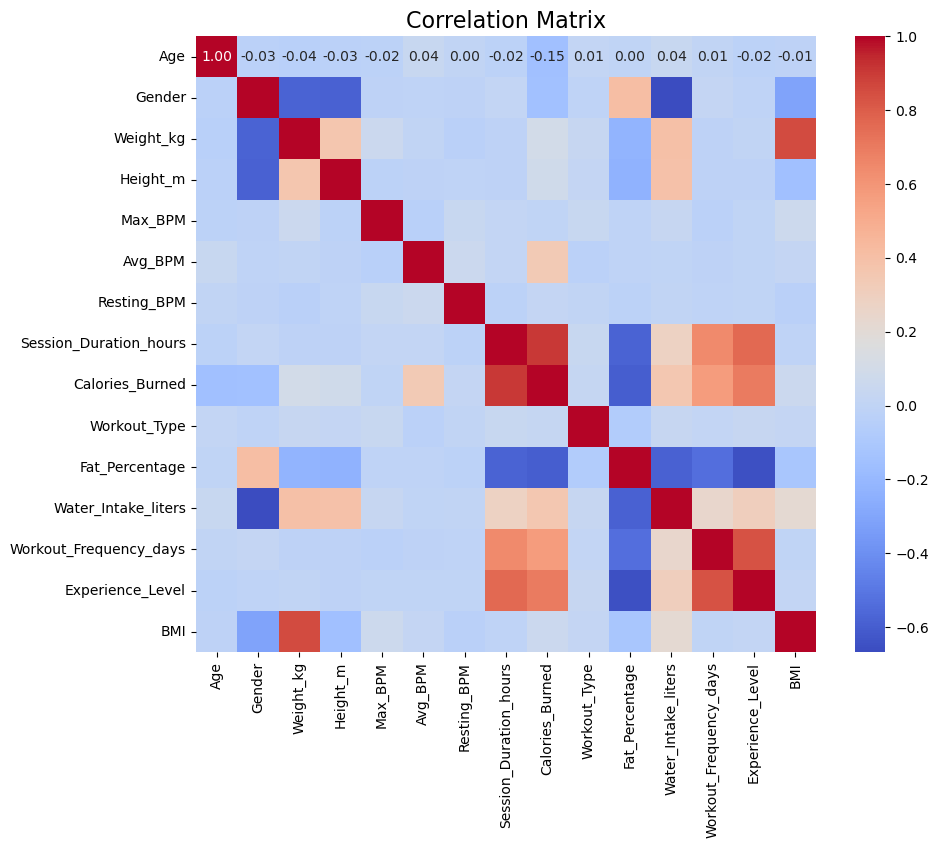

In [48]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)

## Разработка моделей

In [49]:
from math import *

In [50]:
threshold = 0.03

In [51]:
correlation = df.corr()
correlation.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days,Experience_Level,BMI
Age,1.000000,-0.027175,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.013615,0.002370,0.041528,0.008055,-0.018676,-0.013691
Gender,-0.027175,1.000000,-0.579340,-0.583503,-0.010245,-0.009648,-0.014062,0.012200,-0.150646,-0.007142,0.407309,-0.667658,0.018902,-0.003224,-0.311970
Weight_kg,-0.036340,-0.579340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,0.034077,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height_m,-0.027837,-0.583503,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,0.022492,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,-0.010245,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,0.039824,-0.009056,0.031621,-0.029099,0.000545,0.067105


In [52]:
high_corr_features = correlation.index[abs(correlation['Calories_Burned']) > threshold].tolist()
high_corr_features

['Age',
 'Gender',
 'Weight_kg',
 'Height_m',
 'Avg_BPM',
 'Session_Duration_hours',
 'Calories_Burned',
 'Fat_Percentage',
 'Water_Intake_liters',
 'Workout_Frequency_days',
 'Experience_Level',
 'BMI']

In [53]:
correlation['Calories_Burned']

Age                      -0.154679
Gender                   -0.150646
Weight_kg                 0.095443
Height_m                  0.086348
Max_BPM                   0.002090
Avg_BPM                   0.339659
Resting_BPM               0.016518
Session_Duration_hours    0.908140
Calories_Burned           1.000000
Workout_Type              0.024190
Fat_Percentage           -0.597615
Water_Intake_liters       0.356931
Workout_Frequency_days    0.576150
Experience_Level          0.694129
BMI                       0.059761
Name: Calories_Burned, dtype: float64

In [54]:
high_corr_features.remove('Calories_Burned')

In [55]:
X_selected = df[high_corr_features]

In [56]:
y = df['Calories_Burned']
y

0      1313.0
1       883.0
2       677.0
3       532.0
4       556.0
        ...  
968    1364.0
969    1260.0
970     929.0
971     883.0
972     542.0
Name: Calories_Burned, Length: 973, dtype: float64

In [57]:
X = df.drop(columns='Calories_Burned')

In [58]:
X.columns

Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_hours', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake_liters', 'Workout_Frequency_days',
       'Experience_Level', 'BMI'],
      dtype='object')

In [59]:
y.name

'Calories_Burned'

### Random Forest Regressor

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = rf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, auc, r2_score, mean_squared_error

In [64]:
mse = mean_squared_error(y_test, y_pred)
mse

1672.8328061538464

In [65]:
r2 = r2_score(y_test, y_pred)
r2

0.9714476825915225

In [66]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1672.8328061538464
R-squared: 0.9714476825915225


In [67]:
# calling root mean squared function from numpy 
np.sqrt(mse)

40.9002788028865

### XGB Regressor

In [71]:
# pip install xgboost
from xgboost import XGBRegressor

In [72]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred = xgb.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
mse

1372.210165062609

In [75]:
r2 = r2_score(y_test, y_pred)
r2

0.976578782984243

In [76]:
np.sqrt(mse)

37.04335520795341

### Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr_model = LinearRegression()

In [79]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = lr_model.predict(X_test)

In [81]:
mse = mean_squared_error(y_test, y_pred)
mse

1465.3809046985928

In [82]:
r2 = r2_score(y_test, y_pred)
r2

0.9749885221276392

In [83]:
df_result = pd.DataFrame({
    'Actual Calories_Burned': y_test.round(1),
    'Predicted Calories_Burned': y_pred.round(1),
    'Absolute Difference': abs(y_pred - y_test).round(1)
})

In [84]:
df_result

,Actual Calories_Burned,Predicted Calories_Burned,Absolute Difference
937,1017.0,1035.5,18.5
318,1100.0,1046.1,53.9
52,750.0,728.3,21.7
375,715.0,730.2,15.2
689,972.0,994.3,22.3
...,...,...,...
816,875.0,922.3,47.3
630,1287.0,1306.9,19.9
407,1205.0,1133.8,71.2
863,1102.0,1158.5,56.5
